In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.style.use("seaborn-colorblind")
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =12
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 14 # Overall title
plt.rcParams["axes.labelsize"] = 14 # Axes labels

In [3]:
## Loading Allan Lerners data
Lerner=pd.read_excel(r'../Spreadsheets/Supporting_Information_2.xlsx', sheet_name='Lerner2021_FilteredMI')
Lerner_MG=pd.read_excel(r'../Spreadsheets/Supporting_Information_2.xlsx', sheet_name='Lerner2021_FilteredMG')
Lerner_MG_F8=Lerner_MG.loc[Lerner_MG['Fissure']==8]
Has_Sisot=Lerner['δ34S']>-5

In [45]:
# # This is our FeO filter
# grad= (1000-300)/(12-6)+10 # Before was 135
# inter= (-grad*6) + 300-20 #Before was -410

In [65]:
# This is our FeO filter
grad= 135
inter=-410

## Filter for Allan Lerners data for degassing

In [66]:
FeO_Lin=np.linspace(6, 13, 50)

S_Degass_Lin=grad*FeO_Lin+inter
S_Degass_Lim=grad*Lerner['FeOT wt%_Raw']+inter
Has_Sulf_Lerner=Lerner['S_Sulf']>0
Degass_Lerner=Lerner['S_Raw_Glass_Meas']<S_Degass_Lim
Undegass_Lerner=(Lerner['S_Raw_Glass_Meas']>=S_Degass_Lim)
Degassed_Lerner=Lerner.loc[Lerner['S_Raw_Glass_Meas']<S_Degass_Lim]
Undegassed_Lerner=Lerner.loc[(Lerner['S_Raw_Glass_Meas']>=S_Degass_Lim)]


## Relevant matlab scripts
- Cu_Se_Fe_SulfideRemovalModels.m
- Seems to have some analysis of Partition coefficienst needed for removal


In [67]:
# Loading 2018 melt inclusion data
All2018_MI=pd.read_excel(r'../Spreadsheets/Supporting_Information_2.xlsx', sheet_name="Wieser_Ol_Hosted_MI_2018")

JustF8_MI=(All2018_MI['Sample number']=="LL4")|(All2018_MI['Sample number']=="LL7")|(All2018_MI['Sample number']=="LL8")
F8_MI=All2018_MI.loc[JustF8_MI]
LL4_MI=All2018_MI['Sample number']=="LL4"
LL7_MI=All2018_MI['Sample number']=="LL7"
LL8_MI=All2018_MI['Sample number']=="LL8"

# Loading 2018 matrix glass
All2018_MG=pd.read_excel(r'../Spreadsheets/Supporting_Information_2.xlsx', sheet_name="Wieser_MatrixGlass_2018")
JustF8_MG=(All2018_MG['Sample number']=="LL4")|(All2018_MG['Sample number']=="LL7")|(All2018_MG['Sample number']=="LL8")
F8_MG=All2018_MG.loc[JustF8_MG]

S_Degass_Lim=grad*F8_MI['FeO_MI EPMA']+inter
Degass=F8_MI['S_MI EPMA (ppm)']<S_Degass_Lim
Undegass=(F8_MI['S_MI EPMA (ppm)']>=S_Degass_Lim)
Degassed_Wieser=F8_MI.loc[F8_MI['S_MI EPMA (ppm)']<S_Degass_Lim]
Undegassed_Wieser=F8_MI.loc[(F8_MI['S_MI EPMA (ppm)']>=S_Degass_Lim)]

Has_Sulf_Wieser=F8_MI['S_Sulf']>0

In [68]:
F8_MI['S_Sulf_Restored_PEC']=(F8_MI['S_MI EPMA (ppm)']+F8_MI['S_Sulf'])/(1+F8_MI['Amount  PEC (%)']/100)

C:\Users\penny\AppData\Local\Temp\ipykernel_30168\616816808.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  F8_MI['S_Sulf_Restored_PEC']=(F8_MI['S_MI EPMA (ppm)']+F8_MI['S_Sulf'])/(1+F8_MI['Amount  PEC (%)']/100)


## Ulu data

In [69]:
# Loading previous data from Chalcohile paper
Ulu_MI=pd.read_excel(r'../Spreadsheets/Supporting_Information_2.xlsx', sheet_name="Wieser_Ol_Hosted_MI_1969_1974")
Ulu_MI=Ulu_MI.loc[Ulu_MI['PEC amount']<0]


## Three part figure that also shows PEC vs. S amount

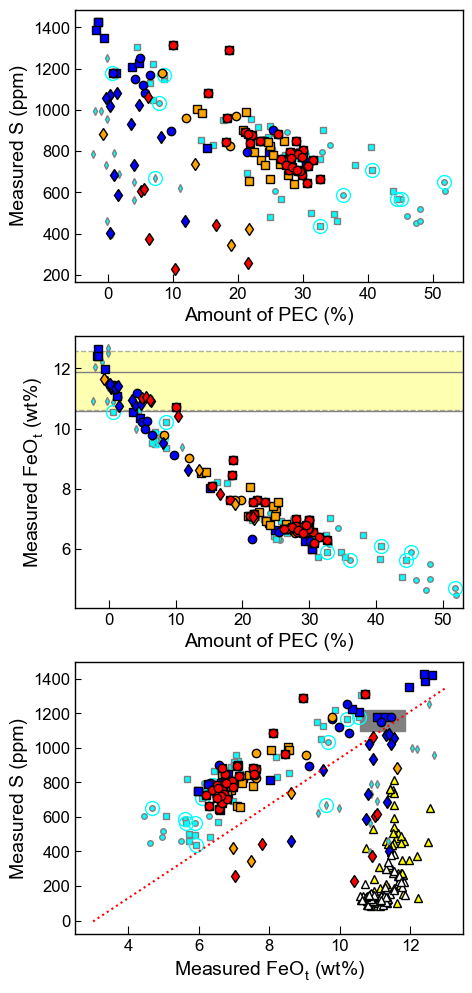

In [70]:
from matplotlib import patches
## Defining Degassed-Undegassing line
fig, ((ax10, ax0, ax1)) = plt.subplots(3,1, figsize = (5,12)) # adjust dimensions of figure here


############### NEW BIT ###################################
# S vs. FeO
# ax10.plot(0*Lerner_MG_F8['S ppm (with sulfide restored, if applicable)'], 
#          Lerner_MG_F8['S ppm (with sulfide restored, if applicable)'], '^k', mfc='yellow')
ax10.plot(Lerner['PEC_Equivalent'].loc[Undegass_Lerner&Has_Sulf_Lerner], 
Lerner['S_Raw_Glass_Meas'].loc[Undegass_Lerner&Has_Sulf_Lerner], 'ok', mec='grey', mfc='cyan', ms=4)
ax10.plot(Lerner['PEC_Equivalent'].loc[Undegass_Lerner&(~Has_Sulf_Lerner)], 
Lerner['S_Raw_Glass_Meas'].loc[Undegass_Lerner&(~Has_Sulf_Lerner)], 'sk', mec='grey', mfc='cyan', ms=4)
ax10.plot(Lerner['PEC_Equivalent'].loc[Degass_Lerner], 
Lerner['S_Raw_Glass_Meas'].loc[Degass_Lerner], 'dk', mec='grey', mfc='cyan', ms=4)

ax10.plot(Lerner['PEC_Equivalent'].loc[Has_Sisot], 
Lerner['S_Raw_Glass_Meas'].loc[Has_Sisot], 'o', mfc='None', mec='cyan', ms=10)



# Plotting undegassed ones based on whether they have a sulfide or not. 
ax10.plot(F8_MI['Amount  PEC (%)'].loc[LL4_MI&(~Has_Sulf_Wieser)&(Undegass)], 
         F8_MI['S_MI EPMA (ppm)'].loc[LL4_MI&(~Has_Sulf_Wieser)&(Undegass)], 'sk', mfc='blue')

ax10.plot(F8_MI['Amount  PEC (%)'].loc[LL7_MI&(~Has_Sulf_Wieser)&(Undegass)],
         F8_MI['S_MI EPMA (ppm)'].loc[LL7_MI&(~Has_Sulf_Wieser)&(Undegass)], 'sk', mfc='orange')

ax10.plot(F8_MI['Amount  PEC (%)'].loc[LL8_MI&(~Has_Sulf_Wieser)&(Undegass)],
         F8_MI['S_MI EPMA (ppm)'].loc[LL8_MI&(~Has_Sulf_Wieser)&(Undegass)], 'sk', mfc='red')

ax10.plot(F8_MI['Amount  PEC (%)'].loc[LL4_MI&(Has_Sulf_Wieser)&(Undegass)], 
         F8_MI['S_MI EPMA (ppm)'].loc[LL4_MI&(Has_Sulf_Wieser)&(Undegass)], 'ok', mfc='blue')

ax10.plot(F8_MI['Amount  PEC (%)'].loc[LL7_MI&(Has_Sulf_Wieser)&(Undegass)],
         F8_MI['S_MI EPMA (ppm)'].loc[LL7_MI&(Has_Sulf_Wieser)&(Undegass)], 'ok', mfc='orange')

ax10.plot(F8_MI['Amount  PEC (%)'].loc[LL8_MI&(~Has_Sulf_Wieser)&(Undegass)],
         F8_MI['S_MI EPMA (ppm)'].loc[LL8_MI&(~Has_Sulf_Wieser)&(Undegass)], 'ok', mfc='red')
## Plot Degassed ones all as diamonds. 
ax10.plot(F8_MI['Amount  PEC (%)'].loc[LL4_MI&(Degass)], 
         F8_MI['S_MI EPMA (ppm)'].loc[LL4_MI&(Degass)], 'dk', mfc='blue')

ax10.plot(F8_MI['Amount  PEC (%)'].loc[LL7_MI&(Degass)],
         F8_MI['S_MI EPMA (ppm)'].loc[LL7_MI&(Degass)], 'dk', mfc='orange')

ax10.plot(F8_MI['Amount  PEC (%)'].loc[LL8_MI&(Degass)],
         F8_MI['S_MI EPMA (ppm)'].loc[LL8_MI&(Degass)], 'dk', mfc='red')






# ax0.plot(-Ulu_MI['PEC amount'], Ulu_MI['FeO'], '.', mfc='grey', mec='grey', zorder=0, ms=3, alpha=0.5)
# ax10.plot(Ulu_MI['FeO'], Ulu_MI['S_RAW'], '.', mfc='grey', mec='grey', zorder=0, ms=3, alpha=0.5)


# lowx=min(F8_MG['FeO EPMA'])
# lowy=1160-60
# plusx=max(F8_MG['FeO EPMA'])-min(F8_MG['FeO EPMA'])
# plusy=120
# rect = patches.Rectangle( (lowx, lowy), plusx, plusy, linewidth=1,
#                          edgecolor='grey',facecolor='grey', label='test')

# ax10.add_patch(rect)

ax10.set_ylabel('Measured S (ppm)')
ax10.set_xlabel('Amount of PEC (%)')

# FEO vs. amount of PEC
# FeO_Conc=pd.concat(F8_MG['FeO EPMA'], Lerner_MG_F8['FeOT wt%'])
rect = patches.Rectangle((-10,min(F8_MG['FeO EPMA'])),65,
                         (max(F8_MG['FeO EPMA'])-min(F8_MG['FeO EPMA'])),linewidth=1,
                         edgecolor='gray',facecolor='None', label='test', alpha=1)

rect2 = patches.Rectangle((-10,min(Lerner_MG_F8['FeOT wt%'])),65,
                         (max(Lerner_MG_F8['FeOT wt%'])-min(Lerner_MG_F8['FeOT wt%'])),linewidth=1,
                         edgecolor='k', linestyle='--', facecolor='yellow', label='test', alpha=0.3)
ax0.add_patch(rect2)
ax0.add_patch(rect)
# Lerner separated out
ax0.plot(Lerner['PEC_Equivalent'].loc[Undegass_Lerner&Has_Sulf_Lerner], 
Lerner['FeOT wt%_Raw'].loc[Undegass_Lerner&Has_Sulf_Lerner], 'ok', mec='grey', mfc='cyan', ms=4)
ax0.plot(Lerner['PEC_Equivalent'].loc[Undegass_Lerner&(~Has_Sulf_Lerner)], 
Lerner['FeOT wt%_Raw'].loc[Undegass_Lerner&(~Has_Sulf_Lerner)], 'sk', mec='grey', mfc='cyan', ms=4)
ax0.plot(Lerner['PEC_Equivalent'].loc[Degass_Lerner], 
Lerner['FeOT wt%_Raw'].loc[Degass_Lerner], 'dk', mec='grey', mfc='cyan', ms=4)


## highlighting ones with isotopes
Has_Sisot=Lerner['δ34S']>-5
ax0.plot(Lerner['PEC_Equivalent'].loc[Has_Sisot], 
Lerner['FeOT wt%_Raw'].loc[Has_Sisot], 'o', mfc='None', mec='cyan', ms=10)






# Plotting undegassed ones based on whether they have a sulfide or not. 
ax0.plot(F8_MI['Amount  PEC (%)'].loc[LL4_MI&(~Has_Sulf_Wieser)&(Undegass)], 
         F8_MI['FeO_MI EPMA'].loc[LL4_MI&(~Has_Sulf_Wieser)&(Undegass)], 'sk', mfc='blue')

ax0.plot(F8_MI['Amount  PEC (%)'].loc[LL7_MI&(~Has_Sulf_Wieser)&(Undegass)],
         F8_MI['FeO_MI EPMA'].loc[LL7_MI&(~Has_Sulf_Wieser)&(Undegass)], 'sk', mfc='orange')

ax0.plot(F8_MI['Amount  PEC (%)'].loc[LL8_MI&(~Has_Sulf_Wieser)&(Undegass)],
         F8_MI['FeO_MI EPMA'].loc[LL8_MI&(~Has_Sulf_Wieser)&(Undegass)], 'sk', mfc='red')

ax0.plot(F8_MI['Amount  PEC (%)'].loc[LL4_MI&(Has_Sulf_Wieser)&(Undegass)], 
         F8_MI['FeO_MI EPMA'].loc[LL4_MI&(Has_Sulf_Wieser)&(Undegass)], 'ok', mfc='blue')

ax0.plot(F8_MI['Amount  PEC (%)'].loc[LL7_MI&(Has_Sulf_Wieser)&(Undegass)],
         F8_MI['FeO_MI EPMA'].loc[LL7_MI&(Has_Sulf_Wieser)&(Undegass)], 'ok', mfc='orange')

ax0.plot(F8_MI['Amount  PEC (%)'].loc[LL8_MI&(~Has_Sulf_Wieser)&(Undegass)],
         F8_MI['FeO_MI EPMA'].loc[LL8_MI&(~Has_Sulf_Wieser)&(Undegass)], 'ok', mfc='red')
## Plot Degassed ones all as diamonds. 
ax0.plot(F8_MI['Amount  PEC (%)'].loc[LL4_MI&(Degass)], 
         F8_MI['FeO_MI EPMA'].loc[LL4_MI&(Degass)], 'dk', mfc='blue')

ax0.plot(F8_MI['Amount  PEC (%)'].loc[LL7_MI&(Degass)],
         F8_MI['FeO_MI EPMA'].loc[LL7_MI&(Degass)], 'dk', mfc='orange')

ax0.plot(F8_MI['Amount  PEC (%)'].loc[LL8_MI&(Degass)],
         F8_MI['FeO_MI EPMA'].loc[LL8_MI&(Degass)], 'dk', mfc='red')
# Axis labels. 
ax0.set_xlabel('Amount of PEC (%)')
ax0.set_ylabel('Measured FeO$_{t}$ (wt%)')


# S vs. FeO
ax1.plot(Lerner_MG_F8['FeOT wt%'], 
         Lerner_MG_F8['S ppm (with sulfide restored, if applicable)'], '^k', mfc='yellow')
ax1.plot(Lerner['FeOT wt%_Raw'].loc[Undegass_Lerner&Has_Sulf_Lerner], 
Lerner['S_Raw_Glass_Meas'].loc[Undegass_Lerner&Has_Sulf_Lerner], 'ok', mec='grey', mfc='cyan', ms=4)
ax1.plot(Lerner['FeOT wt%_Raw'].loc[Undegass_Lerner&(~Has_Sulf_Lerner)], 
Lerner['S_Raw_Glass_Meas'].loc[Undegass_Lerner&(~Has_Sulf_Lerner)], 'sk', mec='grey', mfc='cyan', ms=4)
ax1.plot(Lerner['FeOT wt%_Raw'].loc[Degass_Lerner], 
Lerner['S_Raw_Glass_Meas'].loc[Degass_Lerner], 'dk', mec='grey', mfc='cyan', ms=4)

ax1.plot(Lerner['FeOT wt%_Raw'].loc[Has_Sisot], 
Lerner['S_Raw_Glass_Meas'].loc[Has_Sisot], 'o', mfc='None', mec='cyan', ms=10)



# Plotting undegassed ones based on whether they have a sulfide or not. 
ax1.plot(F8_MI['FeO_MI EPMA'].loc[LL4_MI&(~Has_Sulf_Wieser)&(Undegass)], 
         F8_MI['S_MI EPMA (ppm)'].loc[LL4_MI&(~Has_Sulf_Wieser)&(Undegass)], 'sk', mfc='blue')

ax1.plot(F8_MI['FeO_MI EPMA'].loc[LL7_MI&(~Has_Sulf_Wieser)&(Undegass)],
         F8_MI['S_MI EPMA (ppm)'].loc[LL7_MI&(~Has_Sulf_Wieser)&(Undegass)], 'sk', mfc='orange')

ax1.plot(F8_MI['FeO_MI EPMA'].loc[LL8_MI&(~Has_Sulf_Wieser)&(Undegass)],
         F8_MI['S_MI EPMA (ppm)'].loc[LL8_MI&(~Has_Sulf_Wieser)&(Undegass)], 'sk', mfc='red')

ax1.plot(F8_MI['FeO_MI EPMA'].loc[LL4_MI&(Has_Sulf_Wieser)&(Undegass)], 
         F8_MI['S_MI EPMA (ppm)'].loc[LL4_MI&(Has_Sulf_Wieser)&(Undegass)], 'ok', mfc='blue')

ax1.plot(F8_MI['FeO_MI EPMA'].loc[LL7_MI&(Has_Sulf_Wieser)&(Undegass)],
         F8_MI['S_MI EPMA (ppm)'].loc[LL7_MI&(Has_Sulf_Wieser)&(Undegass)], 'ok', mfc='orange')

ax1.plot(F8_MI['FeO_MI EPMA'].loc[LL8_MI&(~Has_Sulf_Wieser)&(Undegass)],
         F8_MI['S_MI EPMA (ppm)'].loc[LL8_MI&(~Has_Sulf_Wieser)&(Undegass)], 'ok', mfc='red')
## Plot Degassed ones all as diamonds. 
ax1.plot(F8_MI['FeO_MI EPMA'].loc[LL4_MI&(Degass)], 
         F8_MI['S_MI EPMA (ppm)'].loc[LL4_MI&(Degass)], 'dk', mfc='blue')

ax1.plot(F8_MI['FeO_MI EPMA'].loc[LL7_MI&(Degass)],
         F8_MI['S_MI EPMA (ppm)'].loc[LL7_MI&(Degass)], 'dk', mfc='orange')

ax1.plot(F8_MI['FeO_MI EPMA'].loc[LL8_MI&(Degass)],
         F8_MI['S_MI EPMA (ppm)'].loc[LL8_MI&(Degass)], 'dk', mfc='red')




ax1.plot(F8_MG['FeO EPMA'], F8_MG['SO2 EPMA']*5004.6, '^', mec='k', mfc='white')


# ax0.plot(-Ulu_MI['PEC amount'], Ulu_MI['FeO'], '.', mfc='grey', mec='grey', zorder=0, ms=3, alpha=0.5)
# ax1.plot(Ulu_MI['FeO'], Ulu_MI['S_RAW'], '.', mfc='grey', mec='grey', zorder=0, ms=3, alpha=0.5)


lowx=min(F8_MG['FeO EPMA'])
lowy=1160-60
plusx=max(F8_MG['FeO EPMA'])-min(F8_MG['FeO EPMA'])
plusy=120
rect = patches.Rectangle( (lowx, lowy), plusx, plusy, linewidth=1,
                         edgecolor='grey',facecolor='grey', label='test')

ax1.add_patch(rect)

ax1.set_ylabel('Measured S (ppm)')
ax1.set_xlabel('Measured FeO$_{t}$ (wt%)')

FeO_Lin=np.linspace(3, 13, 50)
 # 170, grad 120 acts as cutoff for Se degassed on. 
S_Degass_Lin=grad*FeO_Lin+inter
ax1.plot(FeO_Lin, S_Degass_Lin, ':r')
S_Degass_Lim=grad*F8_MI['FeO_MI EPMA']-inter
Degassed=F8_MI['S_MI EPMA (ppm)']<S_Degass_Lim
ax0.set_xlim([-5, 53])
fig.savefig('FeO_PEC_S_Systematics.png', dpi=200, bbox_inches='tight')

## Figure showing FeO vs. amount of PEC, and S against PEC

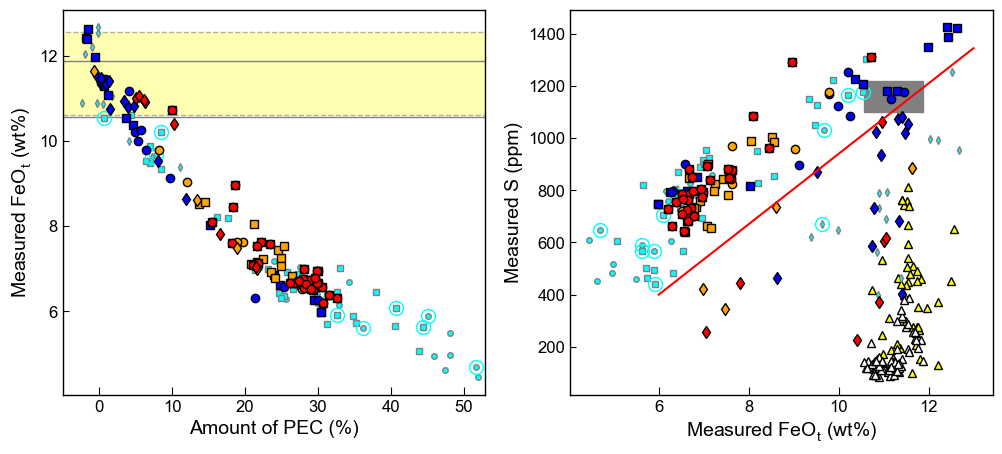

In [71]:
from matplotlib import patches
## Defining Degassed-Undegassing line
fig, ((ax0, ax1)) = plt.subplots(1,2, figsize = (12,5)) # adjust dimensions of figure here

# FEO vs. amount of PEC
# FeO_Conc=pd.concat(F8_MG['FeO EPMA'], Lerner_MG_F8['FeOT wt%'])
rect = patches.Rectangle((-10,min(F8_MG['FeO EPMA'])),65,
                         (max(F8_MG['FeO EPMA'])-min(F8_MG['FeO EPMA'])),linewidth=1,
                         edgecolor='gray',facecolor='None', label='test', alpha=1)

rect2 = patches.Rectangle((-10,min(Lerner_MG_F8['FeOT wt%'])),65,
                         (max(Lerner_MG_F8['FeOT wt%'])-min(Lerner_MG_F8['FeOT wt%'])),linewidth=1,
                         edgecolor='k', linestyle='--', facecolor='yellow', label='test', alpha=0.3)
ax0.add_patch(rect2)
ax0.add_patch(rect)
# Lerner separated out
ax0.plot(Lerner['PEC_Equivalent'].loc[Undegass_Lerner&Has_Sulf_Lerner], 
Lerner['FeOT wt%_Raw'].loc[Undegass_Lerner&Has_Sulf_Lerner], 'ok', mec='grey', mfc='cyan', ms=4)
ax0.plot(Lerner['PEC_Equivalent'].loc[Undegass_Lerner&(~Has_Sulf_Lerner)], 
Lerner['FeOT wt%_Raw'].loc[Undegass_Lerner&(~Has_Sulf_Lerner)], 'sk', mec='grey', mfc='cyan', ms=4)
ax0.plot(Lerner['PEC_Equivalent'].loc[Degass_Lerner], 
Lerner['FeOT wt%_Raw'].loc[Degass_Lerner], 'dk', mec='grey', mfc='cyan', ms=4)


## highlighting ones with isotopes
Has_Sisot=Lerner['δ34S']>-5
ax0.plot(Lerner['PEC_Equivalent'].loc[Has_Sisot], 
Lerner['FeOT wt%_Raw'].loc[Has_Sisot], 'o', mfc='None', mec='cyan', ms=10)






# Plotting undegassed ones based on whether they have a sulfide or not. 
ax0.plot(F8_MI['Amount  PEC (%)'].loc[LL4_MI&(~Has_Sulf_Wieser)&(Undegass)], 
         F8_MI['FeO_MI EPMA'].loc[LL4_MI&(~Has_Sulf_Wieser)&(Undegass)], 'sk', mfc='blue')

ax0.plot(F8_MI['Amount  PEC (%)'].loc[LL7_MI&(~Has_Sulf_Wieser)&(Undegass)],
         F8_MI['FeO_MI EPMA'].loc[LL7_MI&(~Has_Sulf_Wieser)&(Undegass)], 'sk', mfc='orange')

ax0.plot(F8_MI['Amount  PEC (%)'].loc[LL8_MI&(~Has_Sulf_Wieser)&(Undegass)],
         F8_MI['FeO_MI EPMA'].loc[LL8_MI&(~Has_Sulf_Wieser)&(Undegass)], 'sk', mfc='red')

ax0.plot(F8_MI['Amount  PEC (%)'].loc[LL4_MI&(Has_Sulf_Wieser)&(Undegass)], 
         F8_MI['FeO_MI EPMA'].loc[LL4_MI&(Has_Sulf_Wieser)&(Undegass)], 'ok', mfc='blue')

ax0.plot(F8_MI['Amount  PEC (%)'].loc[LL7_MI&(Has_Sulf_Wieser)&(Undegass)],
         F8_MI['FeO_MI EPMA'].loc[LL7_MI&(Has_Sulf_Wieser)&(Undegass)], 'ok', mfc='orange')

ax0.plot(F8_MI['Amount  PEC (%)'].loc[LL8_MI&(~Has_Sulf_Wieser)&(Undegass)],
         F8_MI['FeO_MI EPMA'].loc[LL8_MI&(~Has_Sulf_Wieser)&(Undegass)], 'ok', mfc='red')
## Plot Degassed ones all as diamonds. 
ax0.plot(F8_MI['Amount  PEC (%)'].loc[LL4_MI&(Degass)], 
         F8_MI['FeO_MI EPMA'].loc[LL4_MI&(Degass)], 'dk', mfc='blue')

ax0.plot(F8_MI['Amount  PEC (%)'].loc[LL7_MI&(Degass)],
         F8_MI['FeO_MI EPMA'].loc[LL7_MI&(Degass)], 'dk', mfc='orange')

ax0.plot(F8_MI['Amount  PEC (%)'].loc[LL8_MI&(Degass)],
         F8_MI['FeO_MI EPMA'].loc[LL8_MI&(Degass)], 'dk', mfc='red')
# Axis labels. 
ax0.set_xlabel('Amount of PEC (%)')
ax0.set_ylabel('Measured FeO$_{t}$ (wt%)')


# S vs. FeO
ax1.plot(Lerner_MG_F8['FeOT wt%'], 
         Lerner_MG_F8['S ppm (with sulfide restored, if applicable)'], '^k', mfc='yellow')
ax1.plot(Lerner['FeOT wt%_Raw'].loc[Undegass_Lerner&Has_Sulf_Lerner], 
Lerner['S_Raw_Glass_Meas'].loc[Undegass_Lerner&Has_Sulf_Lerner], 'ok', mec='grey', mfc='cyan', ms=4)
ax1.plot(Lerner['FeOT wt%_Raw'].loc[Undegass_Lerner&(~Has_Sulf_Lerner)], 
Lerner['S_Raw_Glass_Meas'].loc[Undegass_Lerner&(~Has_Sulf_Lerner)], 'sk', mec='grey', mfc='cyan', ms=4)
ax1.plot(Lerner['FeOT wt%_Raw'].loc[Degass_Lerner], 
Lerner['S_Raw_Glass_Meas'].loc[Degass_Lerner], 'dk', mec='grey', mfc='cyan', ms=4)

ax1.plot(Lerner['FeOT wt%_Raw'].loc[Has_Sisot], 
Lerner['S_Raw_Glass_Meas'].loc[Has_Sisot], 'o', mfc='None', mec='cyan', ms=10)



# Plotting undegassed ones based on whether they have a sulfide or not. 
ax1.plot(F8_MI['FeO_MI EPMA'].loc[LL4_MI&(~Has_Sulf_Wieser)&(Undegass)], 
         F8_MI['S_MI EPMA (ppm)'].loc[LL4_MI&(~Has_Sulf_Wieser)&(Undegass)], 'sk', mfc='blue')

ax1.plot(F8_MI['FeO_MI EPMA'].loc[LL7_MI&(~Has_Sulf_Wieser)&(Undegass)],
         F8_MI['S_MI EPMA (ppm)'].loc[LL7_MI&(~Has_Sulf_Wieser)&(Undegass)], 'sk', mfc='orange')

ax1.plot(F8_MI['FeO_MI EPMA'].loc[LL8_MI&(~Has_Sulf_Wieser)&(Undegass)],
         F8_MI['S_MI EPMA (ppm)'].loc[LL8_MI&(~Has_Sulf_Wieser)&(Undegass)], 'sk', mfc='red')

ax1.plot(F8_MI['FeO_MI EPMA'].loc[LL4_MI&(Has_Sulf_Wieser)&(Undegass)], 
         F8_MI['S_MI EPMA (ppm)'].loc[LL4_MI&(Has_Sulf_Wieser)&(Undegass)], 'ok', mfc='blue')

ax1.plot(F8_MI['FeO_MI EPMA'].loc[LL7_MI&(Has_Sulf_Wieser)&(Undegass)],
         F8_MI['S_MI EPMA (ppm)'].loc[LL7_MI&(Has_Sulf_Wieser)&(Undegass)], 'ok', mfc='orange')

ax1.plot(F8_MI['FeO_MI EPMA'].loc[LL8_MI&(~Has_Sulf_Wieser)&(Undegass)],
         F8_MI['S_MI EPMA (ppm)'].loc[LL8_MI&(~Has_Sulf_Wieser)&(Undegass)], 'ok', mfc='red')
## Plot Degassed ones all as diamonds. 
ax1.plot(F8_MI['FeO_MI EPMA'].loc[LL4_MI&(Degass)], 
         F8_MI['S_MI EPMA (ppm)'].loc[LL4_MI&(Degass)], 'dk', mfc='blue')

ax1.plot(F8_MI['FeO_MI EPMA'].loc[LL7_MI&(Degass)],
         F8_MI['S_MI EPMA (ppm)'].loc[LL7_MI&(Degass)], 'dk', mfc='orange')

ax1.plot(F8_MI['FeO_MI EPMA'].loc[LL8_MI&(Degass)],
         F8_MI['S_MI EPMA (ppm)'].loc[LL8_MI&(Degass)], 'dk', mfc='red')




ax1.plot(F8_MG['FeO EPMA'], F8_MG['SO2 EPMA']*5004.6, '^', mec='k', mfc='white')


# ax0.plot(-Ulu_MI['PEC amount'], Ulu_MI['FeO'], '.', mfc='grey', mec='grey', zorder=0, ms=3, alpha=0.5)
# ax1.plot(Ulu_MI['FeO'], Ulu_MI['S_RAW'], '.', mfc='grey', mec='grey', zorder=0, ms=3, alpha=0.5)


lowx=min(F8_MG['FeO EPMA'])
lowy=1160-60
plusx=max(F8_MG['FeO EPMA'])-min(F8_MG['FeO EPMA'])
plusy=120
rect = patches.Rectangle( (lowx, lowy), plusx, plusy, linewidth=1,
                         edgecolor='grey',facecolor='grey', label='test')

ax1.add_patch(rect)

ax1.set_ylabel('Measured S (ppm)')
ax1.set_xlabel('Measured FeO$_{t}$ (wt%)')

FeO_Lin=np.linspace(6, 13, 50)
 # 170, grad 120 acts as cutoff for Se degassed on. 
S_Degass_Lin=grad*FeO_Lin+inter
ax1.plot(FeO_Lin, S_Degass_Lin, '-r')
S_Degass_Lim=grad*F8_MI['FeO_MI EPMA']-inter
Degassed=F8_MI['S_MI EPMA (ppm)']<S_Degass_Lim
ax0.set_xlim([-5, 53])
fig.savefig('FeO_PEC_S_Systematics.png', dpi=200)

## Is our 'degassing' cut off supported by saturation pressures

Text(0, 0.5, 'Sulfur')

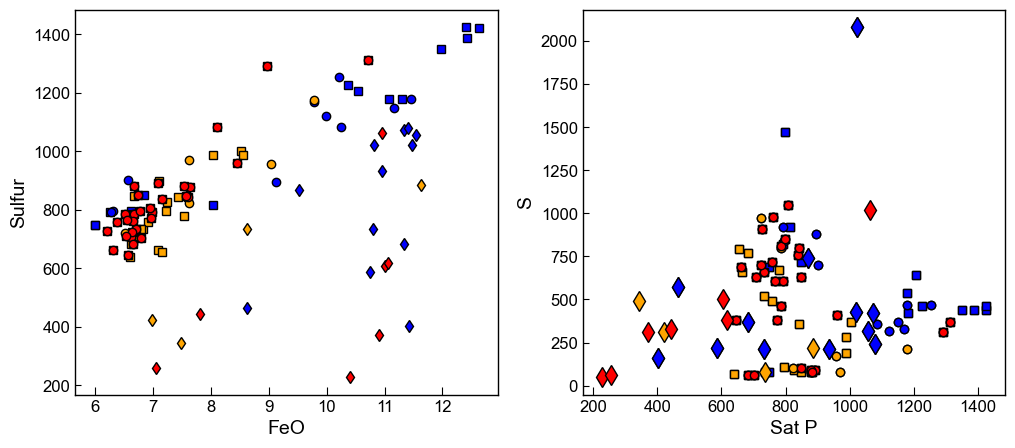

In [73]:
fig, ((ax10, ax1)) = plt.subplots(1,2, figsize = (12,5)) # adjust dimensions of figure here

# Plotting undegassed ones based on whether they have a sulfide or not. 
ax10.plot(F8_MI['FeO_MI EPMA'].loc[LL4_MI&(~Has_Sulf_Wieser)&(Undegass)], 
         F8_MI['S_MI EPMA (ppm)'].loc[LL4_MI&(~Has_Sulf_Wieser)&(Undegass)], 'sk', mfc='blue')

ax10.plot(F8_MI['FeO_MI EPMA'].loc[LL7_MI&(~Has_Sulf_Wieser)&(Undegass)],
         F8_MI['S_MI EPMA (ppm)'].loc[LL7_MI&(~Has_Sulf_Wieser)&(Undegass)], 'sk', mfc='orange')

ax10.plot(F8_MI['FeO_MI EPMA'].loc[LL8_MI&(~Has_Sulf_Wieser)&(Undegass)],
         F8_MI['S_MI EPMA (ppm)'].loc[LL8_MI&(~Has_Sulf_Wieser)&(Undegass)], 'sk', mfc='red')

ax10.plot(F8_MI['FeO_MI EPMA'].loc[LL4_MI&(Has_Sulf_Wieser)&(Undegass)], 
         F8_MI['S_MI EPMA (ppm)'].loc[LL4_MI&(Has_Sulf_Wieser)&(Undegass)], 'ok', mfc='blue')

ax10.plot(F8_MI['FeO_MI EPMA'].loc[LL7_MI&(Has_Sulf_Wieser)&(Undegass)],
         F8_MI['S_MI EPMA (ppm)'].loc[LL7_MI&(Has_Sulf_Wieser)&(Undegass)], 'ok', mfc='orange')

ax10.plot(F8_MI['FeO_MI EPMA'].loc[LL8_MI&(~Has_Sulf_Wieser)&(Undegass)],
         F8_MI['S_MI EPMA (ppm)'].loc[LL8_MI&(~Has_Sulf_Wieser)&(Undegass)], 'ok', mfc='red')
## Plot Degassed ones all as diamonds. 
ax10.plot(F8_MI['FeO_MI EPMA'].loc[LL4_MI&(Degass)], 
         F8_MI['S_MI EPMA (ppm)'].loc[LL4_MI&(Degass)], 'dk', mfc='blue')

ax10.plot(F8_MI['FeO_MI EPMA'].loc[LL7_MI&(Degass)],
         F8_MI['S_MI EPMA (ppm)'].loc[LL7_MI&(Degass)], 'dk', mfc='orange')

ax10.plot(F8_MI['FeO_MI EPMA'].loc[LL8_MI&(Degass)],
         F8_MI['S_MI EPMA (ppm)'].loc[LL8_MI&(Degass)], 'dk', mfc='red')


ax1.plot(F8_MI['S_MI EPMA (ppm)'].loc[LL4_MI&(~Has_Sulf_Wieser)&(Undegass)], 
         F8_MI['SaturationP_bars_VESIcal'].loc[LL4_MI&(~Has_Sulf_Wieser)&(Undegass)], 'sk', mfc='blue')

ax1.plot(F8_MI['S_MI EPMA (ppm)'].loc[LL7_MI&(~Has_Sulf_Wieser)&(Undegass)],
         F8_MI['SaturationP_bars_VESIcal'].loc[LL7_MI&(~Has_Sulf_Wieser)&(Undegass)], 'sk', mfc='orange')

ax1.plot(F8_MI['S_MI EPMA (ppm)'].loc[LL8_MI&(~Has_Sulf_Wieser)&(Undegass)],
         F8_MI['SaturationP_bars_VESIcal'].loc[LL8_MI&(~Has_Sulf_Wieser)&(Undegass)], 'sk', mfc='red')

ax1.plot(F8_MI['S_MI EPMA (ppm)'].loc[LL4_MI&(Has_Sulf_Wieser)&(Undegass)], 
         F8_MI['SaturationP_bars_VESIcal'].loc[LL4_MI&(Has_Sulf_Wieser)&(Undegass)], 'ok', mfc='blue')

ax1.plot(F8_MI['S_MI EPMA (ppm)'].loc[LL7_MI&(Has_Sulf_Wieser)&(Undegass)],
         F8_MI['SaturationP_bars_VESIcal'].loc[LL7_MI&(Has_Sulf_Wieser)&(Undegass)], 'ok', mfc='orange')

ax1.plot(F8_MI['S_MI EPMA (ppm)'].loc[LL8_MI&(~Has_Sulf_Wieser)&(Undegass)],
         F8_MI['SaturationP_bars_VESIcal'].loc[LL8_MI&(~Has_Sulf_Wieser)&(Undegass)], 'ok', mfc='red')
## Plot Degassed ones all as diamonds. 
ax1.plot(F8_MI['S_MI EPMA (ppm)'].loc[LL4_MI&(Degass)], 
         F8_MI['SaturationP_bars_VESIcal'].loc[LL4_MI&(Degass)], 'dk', mfc='blue', ms=10)


ax1.plot(F8_MI['S_MI EPMA (ppm)'].loc[LL4_MI&(~Has_Sulf_Wieser)&(Undegass)], 
         F8_MI['SaturationP_bars_VESIcal'].loc[LL4_MI&(~Has_Sulf_Wieser)&(Undegass)], 'sk', mfc='blue')

ax1.plot(F8_MI['S_MI EPMA (ppm)'].loc[LL7_MI&(~Has_Sulf_Wieser)&(Undegass)],
         F8_MI['SaturationP_bars_VESIcal'].loc[LL7_MI&(~Has_Sulf_Wieser)&(Undegass)], 'sk', mfc='orange')

ax1.plot(F8_MI['S_MI EPMA (ppm)'].loc[LL8_MI&(~Has_Sulf_Wieser)&(Undegass)],
         F8_MI['SaturationP_bars_VESIcal'].loc[LL8_MI&(~Has_Sulf_Wieser)&(Undegass)], 'sk', mfc='red')

ax1.plot(F8_MI['S_MI EPMA (ppm)'].loc[LL4_MI&(Has_Sulf_Wieser)&(Undegass)], 
         F8_MI['SaturationP_bars_VESIcal'].loc[LL4_MI&(Has_Sulf_Wieser)&(Undegass)], 'ok', mfc='blue')

ax1.plot(F8_MI['S_MI EPMA (ppm)'].loc[LL7_MI&(Has_Sulf_Wieser)&(Undegass)],
         F8_MI['SaturationP_bars_VESIcal'].loc[LL7_MI&(Has_Sulf_Wieser)&(Undegass)], 'ok', mfc='orange')

ax1.plot(F8_MI['S_MI EPMA (ppm)'].loc[LL8_MI&(~Has_Sulf_Wieser)&(Undegass)],
         F8_MI['SaturationP_bars_VESIcal'].loc[LL8_MI&(~Has_Sulf_Wieser)&(Undegass)], 'ok', mfc='red')
## Plot Degassed ones all as diamonds. 
ax1.plot(F8_MI['S_MI EPMA (ppm)'].loc[LL4_MI&(Degass)], 
         F8_MI['SaturationP_bars_VESIcal'].loc[LL4_MI&(Degass)], 'dk', mfc='blue', ms=10)

ax1.plot(F8_MI['S_MI EPMA (ppm)'].loc[LL7_MI&(Degass)],
         F8_MI['SaturationP_bars_VESIcal'].loc[LL7_MI&(Degass)], 'dk', mfc='orange', ms=10)

ax1.plot(F8_MI['S_MI EPMA (ppm)'].loc[LL8_MI&(Degass)],
         F8_MI['SaturationP_bars_VESIcal'].loc[LL8_MI&(Degass)], 'dk', mfc='red', ms=10)


ax1.set_xlabel('Sat P')
ax1.set_ylabel('S')
ax10.set_xlabel('FeO')
ax10.set_ylabel('Sulfur')

In [74]:
F8_MI.columns[F8_MI.columns.str.contains('bar')]

Index(['SaturationP_bars_VESIcal'], dtype='object')

Text(0, 0.5, 'Fo')

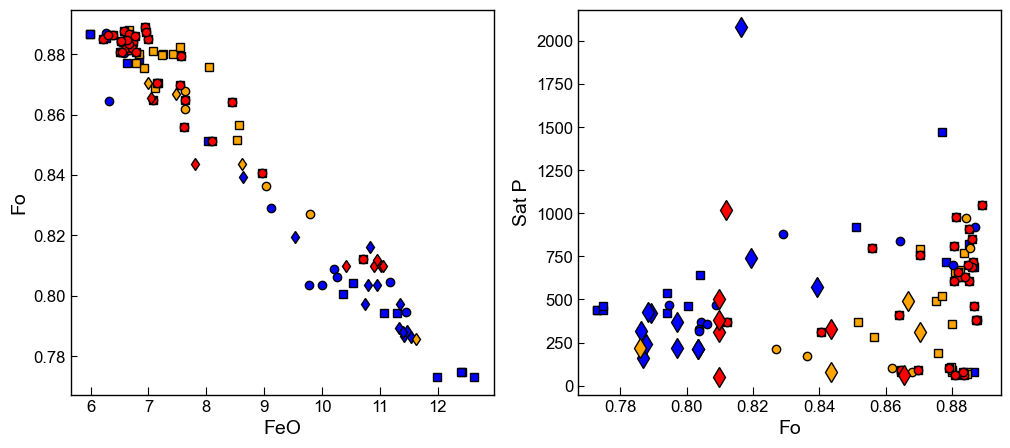

In [75]:
fig, ((ax10, ax1)) = plt.subplots(1,2, figsize = (12,5)) # adjust dimensions of figure here

# Plotting undegassed ones based on whether they have a sulfide or not. 
ax10.plot(F8_MI['FeO_MI EPMA'].loc[LL4_MI&(~Has_Sulf_Wieser)&(Undegass)], 
         F8_MI['Mg# Min'].loc[LL4_MI&(~Has_Sulf_Wieser)&(Undegass)], 'sk', mfc='blue')

ax10.plot(F8_MI['FeO_MI EPMA'].loc[LL7_MI&(~Has_Sulf_Wieser)&(Undegass)],
         F8_MI['Mg# Min'].loc[LL7_MI&(~Has_Sulf_Wieser)&(Undegass)], 'sk', mfc='orange')

ax10.plot(F8_MI['FeO_MI EPMA'].loc[LL8_MI&(~Has_Sulf_Wieser)&(Undegass)],
         F8_MI['Mg# Min'].loc[LL8_MI&(~Has_Sulf_Wieser)&(Undegass)], 'sk', mfc='red')

ax10.plot(F8_MI['FeO_MI EPMA'].loc[LL4_MI&(Has_Sulf_Wieser)&(Undegass)], 
         F8_MI['Mg# Min'].loc[LL4_MI&(Has_Sulf_Wieser)&(Undegass)], 'ok', mfc='blue')

ax10.plot(F8_MI['FeO_MI EPMA'].loc[LL7_MI&(Has_Sulf_Wieser)&(Undegass)],
         F8_MI['Mg# Min'].loc[LL7_MI&(Has_Sulf_Wieser)&(Undegass)], 'ok', mfc='orange')

ax10.plot(F8_MI['FeO_MI EPMA'].loc[LL8_MI&(~Has_Sulf_Wieser)&(Undegass)],
         F8_MI['Mg# Min'].loc[LL8_MI&(~Has_Sulf_Wieser)&(Undegass)], 'ok', mfc='red')
## Plot Degassed ones all as diamonds. 
ax10.plot(F8_MI['FeO_MI EPMA'].loc[LL4_MI&(Degass)], 
         F8_MI['Mg# Min'].loc[LL4_MI&(Degass)], 'dk', mfc='blue')

ax10.plot(F8_MI['FeO_MI EPMA'].loc[LL7_MI&(Degass)],
         F8_MI['Mg# Min'].loc[LL7_MI&(Degass)], 'dk', mfc='orange')

ax10.plot(F8_MI['FeO_MI EPMA'].loc[LL8_MI&(Degass)],
         F8_MI['Mg# Min'].loc[LL8_MI&(Degass)], 'dk', mfc='red')

ax1.plot(F8_MI['Mg# Min'].loc[LL4_MI&(~Has_Sulf_Wieser)&(Undegass)], 
         F8_MI['SaturationP_bars_VESIcal'].loc[LL4_MI&(~Has_Sulf_Wieser)&(Undegass)], 'sk', mfc='blue')

ax1.plot(F8_MI['Mg# Min'].loc[LL7_MI&(~Has_Sulf_Wieser)&(Undegass)],
         F8_MI['SaturationP_bars_VESIcal'].loc[LL7_MI&(~Has_Sulf_Wieser)&(Undegass)], 'sk', mfc='orange')

ax1.plot(F8_MI['Mg# Min'].loc[LL8_MI&(~Has_Sulf_Wieser)&(Undegass)],
         F8_MI['SaturationP_bars_VESIcal'].loc[LL8_MI&(~Has_Sulf_Wieser)&(Undegass)], 'sk', mfc='red')

ax1.plot(F8_MI['Mg# Min'].loc[LL4_MI&(Has_Sulf_Wieser)&(Undegass)], 
         F8_MI['SaturationP_bars_VESIcal'].loc[LL4_MI&(Has_Sulf_Wieser)&(Undegass)], 'ok', mfc='blue')

ax1.plot(F8_MI['Mg# Min'].loc[LL7_MI&(Has_Sulf_Wieser)&(Undegass)],
         F8_MI['SaturationP_bars_VESIcal'].loc[LL7_MI&(Has_Sulf_Wieser)&(Undegass)], 'ok', mfc='orange')

ax1.plot(F8_MI['Mg# Min'].loc[LL8_MI&(~Has_Sulf_Wieser)&(Undegass)],
         F8_MI['SaturationP_bars_VESIcal'].loc[LL8_MI&(~Has_Sulf_Wieser)&(Undegass)], 'ok', mfc='red')
## Plot Degassed ones all as diamonds. 
ax1.plot(F8_MI['Mg# Min'].loc[LL4_MI&(Degass)], 
         F8_MI['SaturationP_bars_VESIcal'].loc[LL4_MI&(Degass)], 'dk', mfc='blue', ms=10)

ax1.plot(F8_MI['Mg# Min'].loc[LL7_MI&(Degass)],
         F8_MI['SaturationP_bars_VESIcal'].loc[LL7_MI&(Degass)], 'dk', mfc='orange', ms=10)

ax1.plot(F8_MI['Mg# Min'].loc[LL8_MI&(Degass)],
         F8_MI['SaturationP_bars_VESIcal'].loc[LL8_MI&(Degass)], 'dk', mfc='red', ms=10)


ax1.set_ylabel('Sat P')
ax1.set_xlabel('Fo')
ax10.set_xlabel('FeO')
ax10.set_ylabel('Fo')